<a href="https://colab.research.google.com/github/jwang2503-dev/Mat-420/blob/main/lesson4DataSetHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

In [34]:
df=pd.read_csv('04-LinearReg_Salary.csv')
df.shape

(30, 3)

In [35]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.200,39344.000
1,1,1.400,46206.000
2,2,1.600,37732.000
3,3,2.100,43526.000
4,4,2.300,39892.000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [37]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000,30.000,30.000
mean,14.500,5.413,76004.000
std,8.803,2.838,27414.430
min,0.000,1.200,37732.000
25%,7.250,3.300,56721.750
50%,14.500,4.800,65238.000
75%,21.750,7.800,100545.750
max,29.000,10.600,122392.000


In [39]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [40]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.30)

X_train=torch.from_numpy(X_trainN.astype(np.float32))
y_train=torch.from_numpy(y_trainN.astype(np.float32)).reshape(-1,1)
X_test=torch.from_numpy(X_testN.astype(np.float32))
y_test=torch.from_numpy(y_testN.astype(np.float32)).reshape(-1,1)

In [41]:
n_samples, n_features = X_train.shape

In [44]:
model=nn.Linear(n_features, 1)

lr=0.001
n_epoch=10000

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    y_pred=model(X_train)
    loss=lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()

    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)


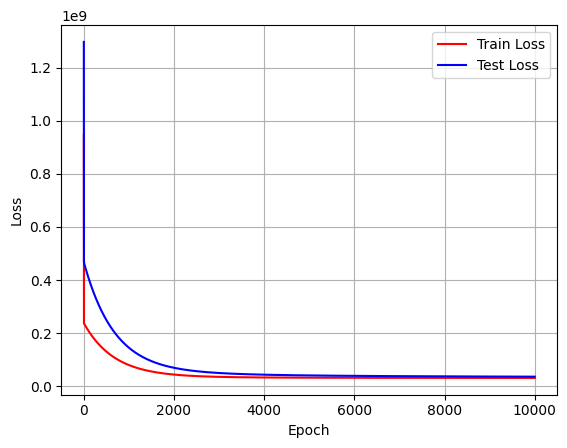

In [45]:
fig=plt.figure()
xv=np.arange(1, n_epoch,1)
plt.plot(xv,train_loss[1:], 'r', label="Train Loss")
plt.plot(xv,test_loss[:-1], 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()

In [46]:
with torch.inference_mode():
    y_test_pred=model(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.96


In [47]:
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.96


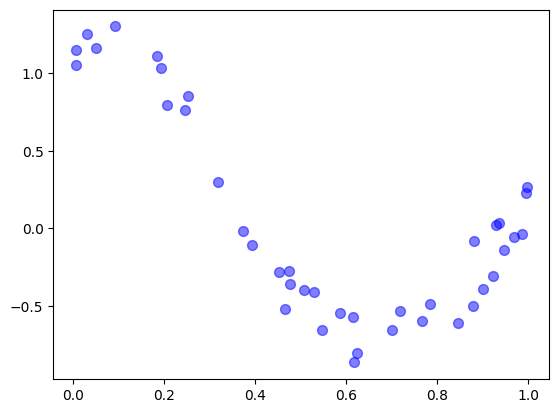

In [48]:
n_samples=40
X = np.random.rand(n_samples)
y=np.cos(1.5 * np.pi * X)+0.5*np.random.rand(n_samples)
X=X.reshape(-1,1)

fig=plt.figure()
plt.scatter(X,y, c='b', s=50, alpha=.5)
fig.show()

In [49]:
poly = PolynomialFeatures(degree=3, include_bias=True)
poly_features = poly.fit_transform(X)
poly_features[10], X[10]

(array([1.        , 0.2536946 , 0.06436095, 0.01632803]), array([0.2536946]))

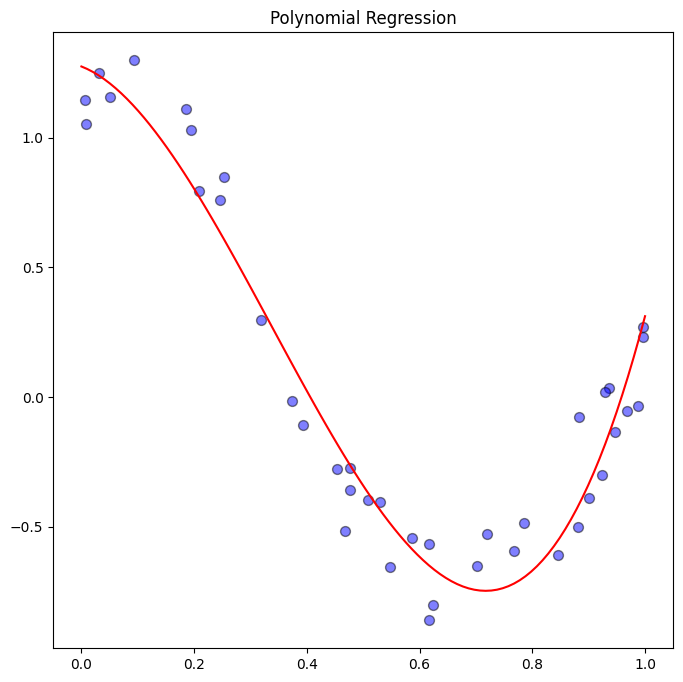

In [50]:
#create polynomial regression model
poly_model = LinearRegression()
poly_model.fit(poly_features, y)


#plot
fig=plt.figure(figsize=(8,8))

#get the regression curve
xv=np.linspace(0,1,100).reshape(-1,1)
xv_to_poly=poly.transform(xv)
y_pred = poly_model.predict(xv_to_poly)
plt.plot(xv, y_pred, '-r')

#add original data

plt.scatter(X,y, c='b', s=50, alpha=.5, edgecolor='k')

plt.title('Polynomial Regression')
plt.show()